# Quantum Teleportation Algorithm

## Importing Libraries

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

## Building the circuit

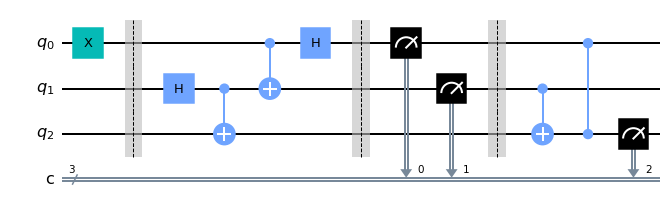

In [2]:
circuit = QuantumCircuit(3, 3)

# transferring information in q0 to q2 without measurement
circuit.h(0)
circuit.barrier()

circuit.h(1)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

circuit.measure([0, 1], [0, 1])
circuit.barrier()

circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.measure(2, 2)

fig = circuit.draw(output = 'mpl')

## Implementation

{'110': 235, '100': 260, '101': 269, '111': 260}


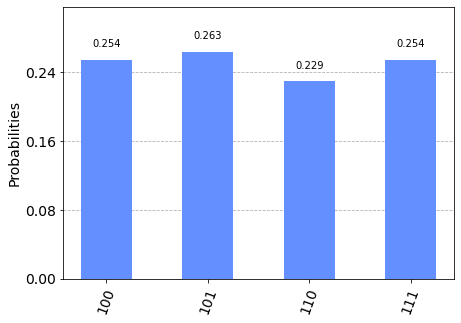

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
print(counts)
plot = plot_histogram(counts)

## Results

We can see that of the possible 8 states, only 4 states have non-zero probability. All these states have the classical register c2 = 1. Because of the first x-gate on q0, we know that q0 was in state |1> and that has been teleported to q2 and thus c2, without making a measurement on q0.